In [1]:
# Dependencies
import os
import glob
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
#to get the different categories from categories.json in Resources

restaurant_categories = []

with open('Resources/categories.json') as json_file:
    cats = json.load(json_file)
    
    for category in cats:
        try:
            if category['parents'][0]=='restaurants':
                restaurant_categories.append(category['alias'])
            
        except Exception as e:
            #print(f'Restaurant not found. Skipping...')
            pass  # no operation

print(len(restaurant_categories))

190


In [62]:
cities = ["Carlsbad,CA", "Encinitas,CA", "Oceanside,CA"]
name_list = []
category_list = []
rating_list = []
review_count_list = []
price_list = []
total_count_dict = {
    "Oceanside,CA": [],
    "Encinitas,CA":[],
    "Carlsbad,CA":[]
}

city_list = []

for city in cities:
    print(city)
    
    for category in restaurant_categories:
      
        filename = f"Resources/{city}/{category}.json"
        #print(filename)
        with open(filename) as json_file:
            restaurants_json = json.load(json_file)
            total_count_dict[city].append(restaurants_json['total'])
            
            for restaurant in restaurants_json['businesses']:
                try:
                    city_list.append(city)
                    name_list.append(restaurant['name'])

                    category_list.append(category) 

                    review_count_list.append(restaurant['review_count'])
                    rating_list.append(restaurant['rating'])

                    #if restaurant does not have a restaurant['price'] value, provide a value (but how?)
                    #https://stackoverflow.com/questions/24898797/check-if-key-exists-and-iterate-the-json-array-using-python
                    if 'price' not in restaurant:
                        price_list.append("0")
                    else:
                        price_list.append(len(restaurant['price']))
                except Exception as e:
                    print (e)

print(len(total_count_dict['Oceanside,CA']))                  
print(len(name_list))
print(len(category_list))
print(len(review_count_list))
print(len(rating_list))
print(len(price_list))

Carlsbad,CA
Encinitas,CA
Oceanside,CA
190
6963
6963
6963
6963
6963


In [91]:
#Total Restaurant Count per Category
total_restaurant_df = pd.DataFrame(total_count_dict)
total_restaurant_df['Category'] = restaurant_categories
total_restaurant_df.head()

,"Oceanside,CA","Encinitas,CA","Carlsbad,CA",Category
0,14,5,13,afghani
1,11,10,11,african
2,0,0,0,andalusian
3,8,4,7,arabian
4,16,23,26,argentine


In [96]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongloian','noodles','sushi','tawanese','thai','vietnamese']
#total_restaurant_df.reset_index(inplace=True)
OCE_Asian_Restarants_total_count = total_restaurant_df.loc[total_restaurant_df['Category'].isin(asian_categories),:]
OCE_Asian_Restarants_total_count=OCE_Asian_Restarants_total_count.set_index('Category')
OCE_Asian_Restarants_total_count

,"Oceanside,CA","Encinitas,CA","Carlsbad,CA"
Category,,,
asianfusion,25,47,36
chinese,51,100,66
dumplings,0,0,0
japanese,46,94,68
korean,6,19,7
malaysian,4,0,1
noodles,8,20,10
sushi,52,108,78
thai,25,48,36


Text(0.5,1,'Total Retaurant Count')

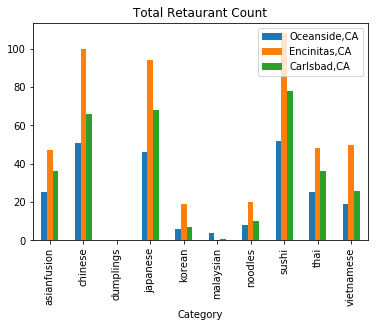

In [109]:
OCE_Asian_Restarants_total_count.plot(kind="bar")
plt.title("Total Retaurant Count")

In [94]:
restaurants_df = pd.DataFrame({
    "City": city_list,
    "Category": category_list,
    "Name": name_list,
    "Rating": rating_list,
    "Review Count": review_count_list,
    "Price":price_list
})
restaurants_df['Price']= pd.to_numeric(restaurants_df['Price'])
restaurants_df.head()

,City,Category,Name,Rating,Review Count,Price
0,"Carlsbad,CA",afghani,Baba Kabob,5.0,30,0
1,"Carlsbad,CA",afghani,Pamir Kabob House,4.5,189,2
2,"Carlsbad,CA",afghani,Ariana Cuisine,4.5,165,1
3,"Carlsbad,CA",afghani,Kabul West,4.0,97,1
4,"Carlsbad,CA",afghani,Ariana Kabob House,4.5,446,2


In [67]:
#Restaurant Rating - Oceanside
oceanside_df = restaurants_df.loc[restaurants_df["City"]=="Oceanside,CA",:]
oceanside_restaurant_rating = oceanside_df.groupby("Category")['Rating'].agg('mean')
oceanside_restaurant_rating = pd.DataFrame(oceanside_restaurant_rating)
#oceanside_restaurant_rating.head()

In [68]:
#Restaurant Rating - Carlsbad
carlsbad_df = restaurants_df.loc[restaurants_df["City"]=="Carlsbad,CA",:]
carlsbad_restaurant_rating = carlsbad_df.groupby("Category")['Rating'].agg('mean')
carlsbad_restaurant_rating_df = pd.DataFrame(carlsbad_restaurant_rating)
#carlsbad_restaurant_rating_df.head()

In [69]:
#Merged Files - Restaurant Rating Oceanside, Carlsbad, Encinitas
restaurant_rating = pd.merge(oceanside_restaurant_rating,carlsbad_restaurant_rating_df, on="Category", how="outer")
restaurant_rating_df = restaurant_rating.rename(columns={"Rating_x": "Avg Oceanside Restaurant Rating", "Rating_y":"Avg Carlsbad Restaurant Rating"})
#restaurant_rating_df.head()

In [70]:
#Restaurant Rating - Encinitas
encinitas_df = restaurants_df.loc[restaurants_df["City"]=="Encinitas,CA",:]
encinitas_restaurant_rating = encinitas_df.groupby("Category")['Rating'].agg('mean')
encinitas_restaurant_rating_df = pd.DataFrame(encinitas_restaurant_rating)
#encinitas_restaurant_rating_df.head()

In [105]:
#Merged Files - Restaurant Rating Oceanside, Carlsbad, Encinitas
OCE_restaurant_rating = pd.merge(restaurant_rating_df,encinitas_restaurant_rating_df, on="Category", how="outer")
OCE_restaurant_rating.rename(columns={"Rating": "Avg Encinitas Restaurant Rating"},inplace=True)
OCE_restaurant_rating.head()

,Avg Oceanside Restaurant Rating,Avg Carlsbad Restaurant Rating,Avg Encinitas Restaurant Rating
Category,,,
afghani,3.964286,4.038462,4.500000
african,4.227273,4.227273,4.250000
arabian,4.375000,4.357143,4.250000
argentine,4.187500,4.134615,4.152174
armenian,4.500000,4.750000,NaN


In [107]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongloian','noodles','sushi','tawanese','thai','vietnamese']
OCE_restaurant_rating.reset_index(inplace=True)
OCE_Asian_Restarants_rating_mean = OCE_restaurant_rating.loc[OCE_restaurant_rating['Category'].isin(asian_categories),:]
OCE_Asian_Restarants_rating_mean = OCE_Asian_Restarants_rating_mean.set_index('Category')
OCE_Asian_Restarants_rating_mean

,Avg Oceanside Restaurant Rating,Avg Carlsbad Restaurant Rating,Avg Encinitas Restaurant Rating
Category,,,
asianfusion,3.680000,3.722222,3.712766
chinese,3.310000,3.500000,3.710000
japanese,3.804348,3.910000,3.990000
korean,3.833333,3.857143,3.868421
malaysian,4.250000,4.000000,NaN
noodles,3.562500,3.650000,3.775000
sushi,3.860000,3.970000,4.020000
thai,3.940000,3.958333,3.895833
vietnamese,4.026316,4.057692,3.970000


Text(0.5,1,'Average Restaurant Rating')

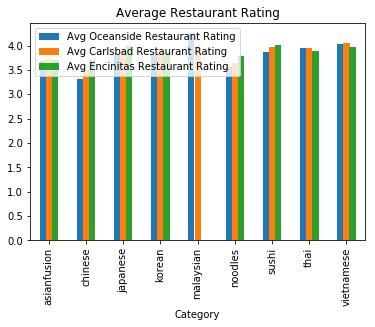

In [110]:
OCE_Asian_Restarants_rating_mean.plot(kind="bar")
plt.title('Average Restaurant Rating')

In [74]:
#Review Count

In [75]:
#Restaurant Review Count Per Category- Oceanside
oceanside_df = restaurants_df.loc[restaurants_df["City"]=="Oceanside,CA",:]
oceanside_restaurant_review_count = oceanside_df.groupby("Category")['Review Count'].agg('sum')
oceanside_restaurant_review_count_df = pd.DataFrame(oceanside_restaurant_review_count)
#oceanside_restaurant_review_count_df.head()

In [76]:
#Restaurant Review Count Per Category- Carlsbad
carlsbad_df = restaurants_df.loc[restaurants_df["City"]=="Carlsbad,CA",:]
carlsbad_restaurant_review_count = carlsbad_df.groupby("Category")['Review Count'].agg('sum')
carlsbad_restaurant_review_count_df = pd.DataFrame(carlsbad_restaurant_review_count)
#carlsbad_restaurant_review_count_df.head()

In [77]:
#Restaurant Review Count Per Category- Encinitas
encinitas_df = restaurants_df.loc[restaurants_df["City"]=="Encinitas,CA",:]
encinitas_restaurant_review_count = encinitas_df.groupby("Category")['Review Count'].agg('sum')
encinitas_restaurant_review_count_df = pd.DataFrame(encinitas_restaurant_review_count)
#encinitas_restaurant_review_count_df.head()

In [78]:
OC_review_count = pd.merge(oceanside_restaurant_review_count_df,carlsbad_restaurant_review_count_df, on="Category", how="outer")
OC_review_count.head()
OC_review_count_df = OC_review_count.rename(columns={"Review Count_x": "Oceanside Review Count",
                                 "Review Count_y": "Carlsbad Review Count"})
#OC_review_count_df.head()

In [118]:
OCE_review_count = pd.merge(OC_review_count_df,encinitas_restaurant_review_count_df, on="Category", how="outer")
OCE_review_count_df = OCE_review_count.rename(columns={"Review Count": "Encinitas Review Count"})
OCE_review_count_df.head()

,Oceanside Review Count,Carlsbad Review Count,Encinitas Review Count
Category,,,
afghani,3346.0,3321.0,927.0
african,2807.0,2807.0,2527.0
arabian,1836.0,1468.0,721.0
argentine,4179.0,3994.0,3109.0
armenian,2715.0,489.0,NaN


In [120]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongloian','noodles','sushi','tawanese','thai','vietnamese']
OCE_review_count_df.reset_index(inplace=True)
OCE_Asian_Restarants_review_count = OCE_review_count_df.loc[OCE_review_count_df['Category'].isin(asian_categories),:]
OCE_Asian_Restarants_review_count = OCE_Asian_Restarants_review_count.set_index('Category')
OCE_Asian_Restarants_review_count

,Oceanside Review Count,Carlsbad Review Count,Encinitas Review Count
Category,,,
asianfusion,5877.0,8843.0,10973.0
chinese,5944.0,9481.0,11731.0
japanese,13778.0,15421.0,15075.0
korean,1650.0,2134.0,6232.0
malaysian,1488.0,732.0,NaN
noodles,2303.0,2663.0,5292.0
sushi,17689.0,18244.0,18388.0
thai,7687.0,10793.0,15321.0
vietnamese,5437.0,8202.0,15711.0


Text(0.5,1,'Total Review Count')

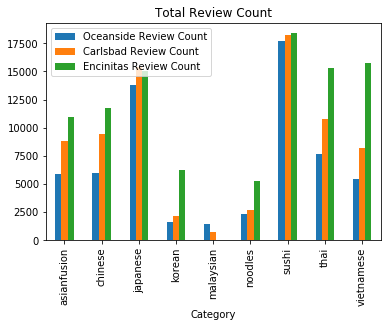

In [122]:
OCE_Asian_Restarants_review_count.plot(kind="bar")
plt.title('Total Review Count')

In [82]:
#Price 

In [83]:
#Restaurant Price Per Category- Oceanside
oceanside_df = restaurants_df.loc[restaurants_df["City"]=="Oceanside,CA",:]
oceanside_restaurant_price = oceanside_df.groupby("Category")['Price'].agg('mean')
oceanside_restaurant_price_df = pd.DataFrame(oceanside_restaurant_price)
#oceanside_restaurant_price_df.head()

In [84]:
#Restaurant Price Per Category- Carlsbad
carlsbad_df = restaurants_df.loc[restaurants_df["City"]=="Carlsbad,CA",:]
carlsbad_restaurant_price = carlsbad_df.groupby("Category")['Price'].agg('mean')
carlsbad_restaurant_price_df = pd.DataFrame(carlsbad_restaurant_price)
#carlsbad_restaurant_price_df.head()

In [85]:
#Restaurant Price Per Category- Encinitas
encinitas_df = restaurants_df.loc[restaurants_df["City"]=="Encinitas,CA",:]
encinitas_restaurant_price = encinitas_df.groupby("Category")['Price'].agg('mean')
encinitas_restaurant_price_df = pd.DataFrame(encinitas_restaurant_price)
#encinitas_restaurant_price_df.head()

In [86]:
#Price merge Oceanside and Carlsbad
OC_price_mean = pd.merge(oceanside_restaurant_price_df,carlsbad_restaurant_price_df, on="Category", how="outer")
OC_price_mean.head()
OC_price_mean_df = OC_price_mean.rename(columns={"Price_x": "Oceanside Mean Price",
                                 "Price_y": "Carlsbad Mean Price"})
#OC_price_mean_df.head()

In [124]:
#Price merge Oceanside, Carlsbad, Encinitas
OCE_price_mean = pd.merge(OC_price_mean_df,encinitas_restaurant_price_df, on="Category", how="outer")
OCE_price_mean_df = OCE_price_mean.rename(columns={"Price": "Encinitas Mean Price"})
OCE_price_mean_df.head()

,Oceanside Mean Price,Carlsbad Mean Price,Encinitas Mean Price
Category,,,
afghani,1.285714,1.307692,1.200000
african,1.090909,1.090909,1.000000
arabian,1.000000,0.857143,0.750000
argentine,1.500000,1.384615,1.391304
armenian,1.000000,0.500000,NaN


In [125]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongloian','noodles','sushi','tawanese','thai','vietnamese']
OCE_price_mean_df.reset_index(inplace=True)
OCE_Asian_Restarants_Price = OCE_price_mean_df.loc[OCE_price_mean_df['Category'].isin(asian_categories),:]
OCE_Asian_Restarants_Price = OCE_Asian_Restarants_Price.set_index('Category')
OCE_Asian_Restarants_Price

,Oceanside Mean Price,Carlsbad Mean Price,Encinitas Mean Price
Category,,,
asianfusion,1.600000,1.638889,1.595745
chinese,1.220000,1.360000,1.360000
japanese,1.782609,1.840000,1.720000
korean,2.000000,2.000000,1.684211
malaysian,1.250000,2.000000,NaN
noodles,1.500000,1.500000,1.250000
sushi,1.860000,1.960000,1.980000
thai,1.800000,1.722222,1.750000
vietnamese,1.052632,1.115385,1.060000


Text(0.5,1,'Average Price Per Category')

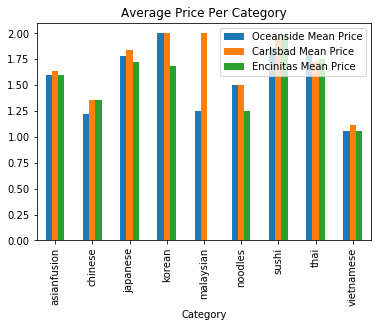

In [127]:
OCE_Asian_Restarants_Price.plot(kind='bar')
plt.title("Average Price Per Category")